# Análisis de Algoritmos ICI522

Los programas resuelven problemas, pero existen muchas formas de resolver un problema. Cómo saber cuándo un programa es mejor que otro?

El análisis de algoritmos es la manera de determinar los requerimientos de tiempo y espacio requeridos por un programa.

La notación O Grande o $\mathcal{O}(f(n))$ se utliza para definir una cota superior del comportamiento asintótico del crecimiento del tiempo de ejecución de un programa.

# Costo Constante

El costo constante se refiere al caso cuando el algoritmo tiene costo invariante al tamaño del problema $\mathcal{O}(1)$

In [10]:
import time

square_exp = lambda n : n**2
square = lambda n : n*n

experiments={1,100,1000,10000}
samples=100
results_1={}
results_2={}
for n in experiments:
    result1=[]
    result2=[]
    for sample in range(samples):
        t = time.process_time()
        square_exp(n)
        t1 = time.process_time() - t
        t = time.process_time()
        square(n)
        t2 = time.process_time() - t
        result1.append(t1)
        result2.append(t2)
    results_1.update({n:result1})
    results_2.update({n:result2})

In [11]:
import pandas as pd

df_sq_exp=pd.DataFrame(results_1)
df_sq=pd.DataFrame(results_2)

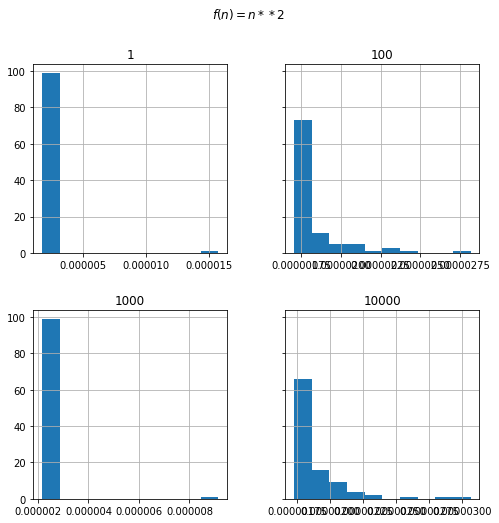

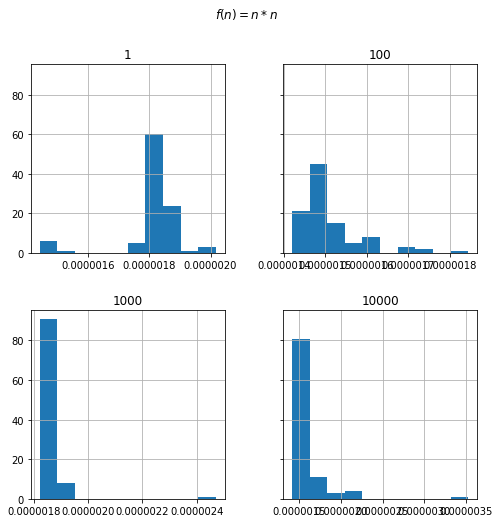

In [26]:
import matplotlib.pyplot as plt

df_sq_exp.hist(figsize=(8,8),sharey=True)
plt.suptitle(r'$f(n)=n**2$')
plt.show()

df_sq.hist(figsize=(8,8),sharey=True)
plt.suptitle(r'$f(n)=n*n$')
plt.show()

In [31]:
df_sq_exp.describe()

,1000,1,100,10000
count,1.000000e+02,100.000000,1.000000e+02,1.000000e+02
mean,2.281510e-06,0.000002,1.830260e-06,1.885970e-06
std,6.948223e-07,0.000001,1.773651e-07,2.171498e-07
min,2.156000e-06,0.000002,1.706000e-06,1.728000e-06
25%,2.188000e-06,0.000002,1.741000e-06,1.756750e-06
50%,2.201000e-06,0.000002,1.755000e-06,1.812000e-06
75%,2.233500e-06,0.000002,1.827000e-06,1.907250e-06
max,9.145000e-06,0.000016,2.817000e-06,3.064000e-06


In [32]:
df_sq.describe()

,1000,1,100,10000
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.859440e-06,1.804500e-06,1.508160e-06,1.580610e-06
std,6.594937e-08,1.009354e-07,7.456401e-08,2.559793e-07
min,1.821000e-06,1.442000e-06,1.420000e-06,1.416000e-06
25%,1.834000e-06,1.800750e-06,1.465000e-06,1.457000e-06
50%,1.845500e-06,1.816500e-06,1.481000e-06,1.493500e-06
75%,1.870250e-06,1.850250e-06,1.517500e-06,1.615000e-06
max,2.471000e-06,2.018000e-06,1.845000e-06,3.525000e-06


In [53]:
from scipy import stats

# Student’s t-test
# Tests whether the means of two independent samples are significantly different.

for n in experiments:
    pvalue=stats.ttest_ind(df_sq[n],df_sq_exp[n])[1]
    print('n={0}, valor-p : {1:06.8f}'.format(n,pvalue))
    if pvalue > 0.05:
        print('Datos provienen de la misma distribucion')
    else:
        print('Datos provienen de distribuciones diferentes')
    print('----------------------------------------')

n=1000, valor-p : 0.00000001
Datos provienen de distribuciones diferentes
----------------------------------------
n=1, valor-p : 0.00059650
Datos provienen de distribuciones diferentes
----------------------------------------
n=100, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=10000, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------


In [97]:
from scipy.stats import ttest_ind
import numpy as np

# problema con tama~{n}os de muestra peque~{n}os!

samples=5
data1 = np.random.normal(1,1,samples)
data2 = np.random.normal(0,1,samples)
stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Datos provienen de la misma distribucion')
else:
    print('Datos provienen de distribuciones diferentes')

stat=2.088, p=0.070
Datos provienen de la misma distribucion


# Costo Lineal

El costo lineal se refiere al caso cuando el algoritmo tiene costo lineal con respecto al tamaño del problema $\mathcal{O}(n)$

In [27]:
def cumsum(n):
    j=0
    for i in range(int(n)):
        j=j+i
    return j

print('La suma acumulativa de 10 es : %5d'%cumsum(10))
print('La suma acumulativa de 1000 es : %5d'%cumsum(1e3))

La suma acumulativa de 10 es :    45
La suma acumulativa de 1000 es : 499500


In [48]:
import time

experiments={1,100,1000,10000}
samples=100
results={}
for n in experiments:
    result=[]
    for sample in range(samples):
        t = time.process_time()
        cumsum(n)
        t1 = time.process_time() - t
        result.append(t1)
    results.update({n:result})


In [49]:
df_cumsum=pd.DataFrame(results)

Text(0.5, 1.0, 'Costo lineal')

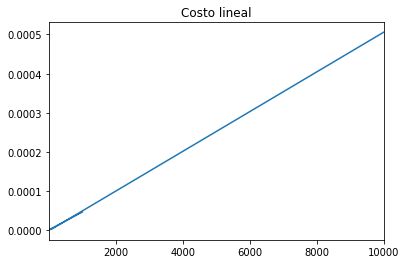

In [54]:
df_cumsum.mean().plot()
plt.title('Costo lineal')

In [98]:
df_cumsum.head()

,1000,1,100,10000
0,0.000051,0.000002,0.000005,0.000446
1,0.000044,0.000001,0.000004,0.000414
2,0.000044,0.000001,0.000004,0.000444
3,0.000044,0.000001,0.000004,0.001121
4,0.000044,0.000001,0.000004,0.000496
